# Day 2 part 1: Building blocks of an SIR

In [1]:
knitr::opts_chunk$set(echo = TRUE)

By now we know how to code a compartmental model. We also know what an SIR model is and what are its main building blocks. In this exercise we will build on our previous code to construct a fully dynamic SIR model.

## 1. Building an SIR model

### Case study: a new virus X2021 has been identified in your town and is currently causing an outbreak. You have been commissioned by WHO to provide modelling projections to have a broad idea of the potential size of this outbreak. The ongoing epidemiological investigation have identified the following facts that might guide you in your model development:

1)  The virus transmits from human to human via micro droplets from the respiratory tract.

2)  Once infection is established infected individuals remain infectious for an average period of 6 days

3)  From a previous outbreak of X2021 in a neighboring town we know that the CFR is \~15%

4)  No known factors have been identified for increased susceptibility in any particular population group

5)  From the same previous outbreak, an infection rate of 0.5 per day (CI95% 0.3 to 0.6) has been estimated Task: Using the code below (from our previous session) build an SIR model that reflects the case above and try to answer the following questions, providing a :

    1)  When do we expect the X2021 outbreak to peak (in days) ?

        **Answer: in 25 days we can see a peak in infections**

    2)  How many people do we expect to get infected at the end of the outbreak?

        **Answer: we can expect \~ 916 individuals to get infected at the end ( R+M)**

    3)  Can you provide a range for the final size of the epidemic (number infected) and the expected peak (in days) based in the uncertainty around the infection rate?

        **Answer: Running the model for beta =0.3 we get a final epidemic size of 647 and a peak in infections in day 56. For beta = 0.6 we get a final size of 957 infections and a peak in 19 days**

Note: Copy the code below into your R Studio session. Try to fill the gaps marked with ??

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
here() starts at C:/Users/juano/Dropbox/Code/Git/ankara-modelling-2025-notebooks

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


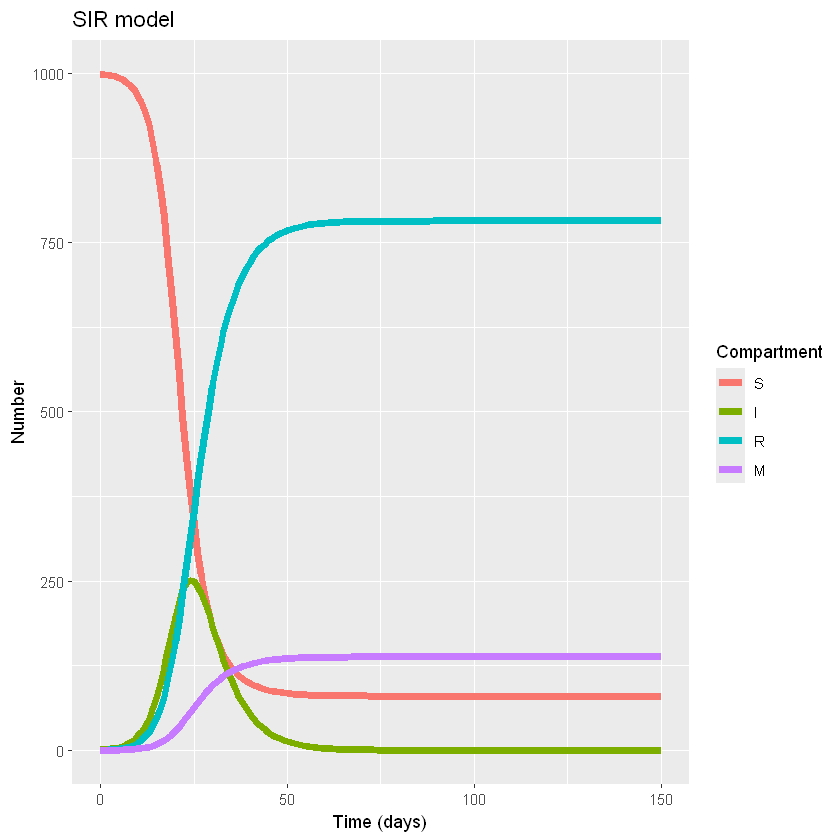

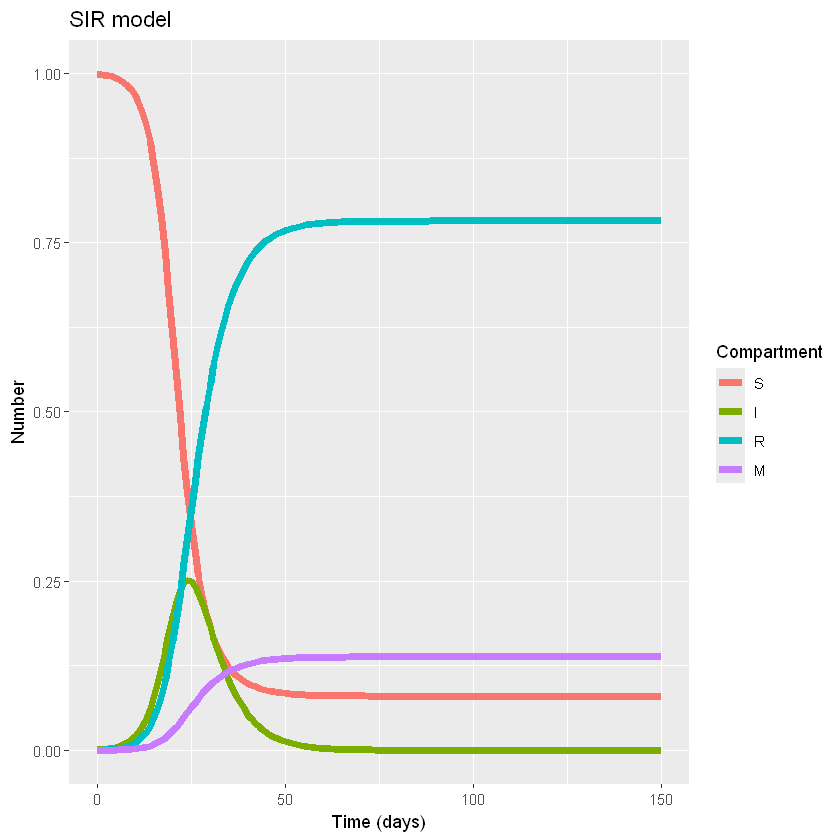

In [2]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)
library(here)

setwd(here())
# Population size:
N <- 1000

# MODEL INPUTS:

# Initial conditions
initial_state_values <- c(
  S = N-1,
  I = 1,
  R = 0,
  M = 0)           

# Parameter values per day
  CFR<- 0.15
   
  gamma <- 1/6 # Recovery rate 
  
  beta <- 0.5  # infection rate
  
  mu <- gamma*CFR/(1-CFR)   # Mortality rate [remember competing hazards! gamma*CFR/(1-CFR) ]
  
  parameters <- c(beta, gamma, mu)


# MODEL FUNCTION: 
times <- seq(from = 0, to = 150, by = 1)   # from 0 to 365 days in daily intervals

sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {     
    
    # Calculating the total population size N (the sum of the number of people in each compartment)
    
    N <- S+I+R
    
    # Calculating the FOI
    
    lambda <- beta*I/N  #  How can we define the force of infection? 
      
      # The differential equations
      dS <-  - lambda * S # can you write the differential equation for S? 
      dI <- lambda * S - I*(gamma+mu)     
    dR <- gamma * I
    dM <- I*mu
    
    return(list(c(dS, dI, dR, dM))) 
  })
  
}



# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))



# turn output data set into long format
output_long <- melt(as.data.frame(output), id = "time")                 


# Plot the number of people in the S, I and R compartments over time
ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line(size=2) +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
       title = "SIR model")    



# Plot the proportion of individuals 

output2_long<- output_long
output2_long$value<-output_long$value/N


# Plot the proportion of people in the S, I and R compartments over time
ggplot(data = output2_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line(size=2) +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number") +                                                       # add label for y axis
  labs(colour = "Compartment",                                           # add legend title  
       title = "SIR model")   


## Analysis of SIR assumptions

Think about the main assumptions and concepts reviewed in our lesson and try to answer:

1)  Why is the homogeneous assumption of risk of infection a simplification and what factors can affect this? What are potential sources of heterogeneity?

    **Answer: Among the potential sources of heterogeneity we can list increased susceptibility among some susceptible (immunosuppression) or increased exposure to infection by factors like age or occupation.**

2)  What factors might affect our assumption of a homogeneous p across the population?

    **Answer: p is the probability of transmission per contact. This constant can widely vary given the type of contact, the intensity and duration of the contact and even the phase of disease of the infection donor in each contact. So it is a simplification, but it holds well for describing the population level behavior of the outbreak.**